In [ ]:
pip install nashpy

In [ ]:
# Find payoff matrix

import nashpy as nash
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
a = 0.5329 # Benefit of attack
b = 0.7956 # Benefit of defence
c = 0.5326 # Cost of attack
d = 0.2660 # Cost of defence
w = 0.9773 # Asset value/Loss to defender
v = 0.1215 # probability of successfull defence

m = 0  # Probability of catching attacker of an unsecured system
n = 0  # Probability of catching attacker of a secure system
p = 0  # Fine to attacker for a successful attack
s = 0  # Fine to attacker for an unsuccessful attack

# Defender Payoff matrix
D = np.array([
        [ 0, -w],
        [ -d + b, -d + v * b - w * (1 - v)],
    ])

game1 = nash.Game(D)

# Attacker Payoff matrix
A = np.array([
        [ 0, -c+a - m * p],
        [ 0, -c+a*(1-v) - v *n * s - (1-v )*m * p],
    ])

game2 = nash.Game(A)

prisoners_dilemma = nash.Game(D, A)
prisoners_dilemma

Bi matrix game with payoff matrices:

Row player:
[[ 0.         -0.9773    ]
 [ 0.5296     -1.02789265]]

Column player:
[[ 0.          0.0003    ]
 [ 0.         -0.06444735]]

In [ ]:
# Find nash equilibrium

import nashpy as nash
import numpy as np

# Payoff matrix for Player 1
player1_payoff = np.array([[0.,   -0.9773],    # Row 1: Player 1's payoffs when Player 2 chooses C and D
                           [0.5296,     -1.02789265]])   # Row 2: Player 1's payoffs for B when Player 2 chooses C and D

# Payoff matrix for Player 2
player2_payoff = np.array([[0.,   0.0003],    # Row 1: Player 2's payoffs when Player 1 chooses A and B
                           [0.,   -0.06444735]])   # Row 2: Player 2's payoffs for D when Player 1 chooses A and B

# Create the 2-player game using Nashpy
game = nash.Game(player1_payoff, player2_payoff)

# Compute Nash equilibria (supports pure and mixed strategies)
equilibria = game.support_enumeration()

# Display the Nash equilibria
print("Nash Equilibria for the given 2x2 game:")
for eq in equilibria:
    print(f"Player 1: {eq[0]}, Player 2: {eq[1]}")


Nash Equilibria for the given 2x2 game:
Player 1: [1. 0.], Player 2: [0. 1.]
Player 1: [0. 1.], Player 2: [1. 0.]
Player 1: [0.99536661 0.00463339], Player 2: [0.08719974 0.91280026]


In [ ]:
# The utility for both players when they both play their first action
sigma_r = np.array([0, 1])
sigma_c = np.array([0, 1])
prisoners_dilemma[sigma_r, sigma_c]

array([-1.02789265, -0.06444735])

In [ ]:
# Check if a strategy is a best response
sigma_r = np.array([0, 1])
sigma_c = np.array([1, 0])
prisoners_dilemma.is_best_response(sigma_r, sigma_c)

(True, True)

In [ ]:
#game1 = nash.Game(D)
generations_D  = game1.replicator_dynamics()
generations_A  = game2.replicator_dynamics()

In [ ]:
generations_D

array([[0.5       , 0.5       ],
       [0.49940108, 0.50059892],
       [0.49880302, 0.50119698],
       ...,
       [0.20988541, 0.79011459],
       [0.20976733, 0.79023267],
       [0.20964941, 0.79035059]])

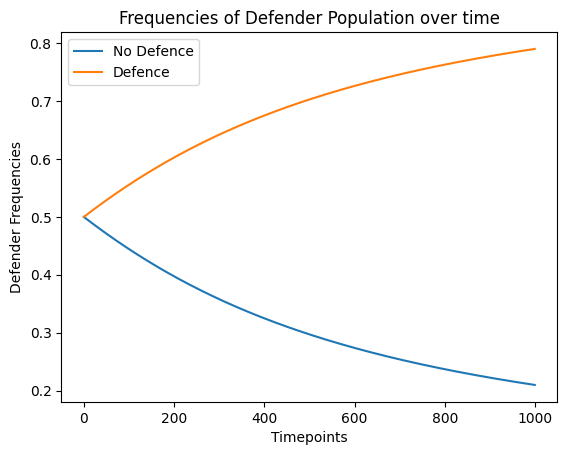

In [ ]:
plt.plot(generations_D)
plt.xlabel("Timepoints")
plt.ylabel("Defender Frequencies")
plt.title("Frequencies of Defender Population over time")
plt.legend(['No Defence', 'Defence'], loc='upper left')

In [ ]:
generations_A

array([[0.5       , 0.5       ],
       [0.50008101, 0.49991899],
       [0.500162  , 0.499838  ],
       ...,
       [0.57405926, 0.42594074],
       [0.57412676, 0.42587324],
       [0.57419424, 0.42580576]])

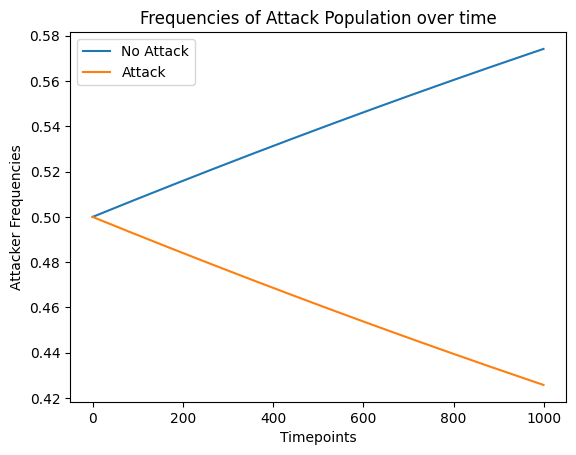

In [ ]:
plt.plot(generations_A)
plt.xlabel("Timepoints")
plt.ylabel("Attacker Frequencies")
plt.title("Frequencies of Attack Population over time")
plt.legend(['No Attack', 'Attack'], loc='upper left')

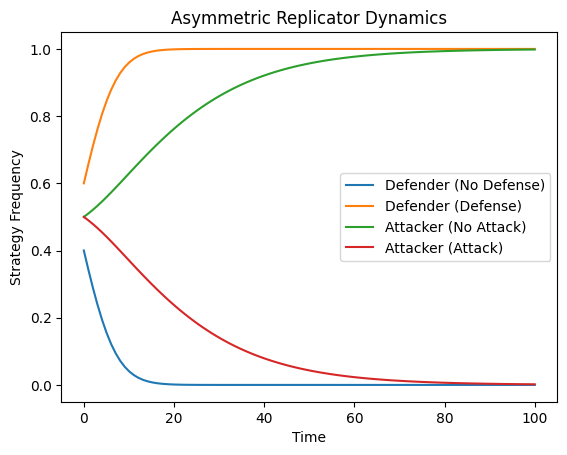

In [ ]:
D = np.array([
        [ 0, -w],
        [ -d + b, -d + v * b - w * (1 - v)],
    ])
A = np.array([
        [ 0, -c+a - m * p],
        [ 0, -c+a*(1-v) - v *n * s - (1-v )*m * p],
    ])
game = nash.Game(D, A)
xs, ys = game.asymmetric_replicator_dynamics()

x0 = np.array([0.4, 0.6])
y0 = np.array([0.5, 0.5])
timepoints = np.linspace(0, 100, 100)
xs, ys = game.asymmetric_replicator_dynamics(x0=x0, y0=y0, timepoints=timepoints)

plt.plot(timepoints, xs[:, 0], label="Defender (No Defense)")
plt.plot(timepoints, xs[:, 1], label="Defender (Defense)")
plt.plot(timepoints, ys[:, 0], label="Attacker (No Attack)")
plt.plot(timepoints, ys[:, 1], label="Attacker (Attack)")

plt.xlabel("Time")
plt.ylabel("Strategy Frequency")
plt.title("Asymmetric Replicator Dynamics")
plt.legend()
plt.show()